## Binary Classifier Comparison with Titanic Dataset

### Table of Content:
* **Step 00:** Detecting paths of data & other related files
* **Step 01:** Import csv files as df & get insights
* **Step 02:** Data processing
* **Step 03:** Data standardization
* **Step 04:** Feature Selection for training & deep dive to data
* **Step 05:** ML Model Training by scikit-learn
* **Step 06:** Evaluate ML models
* **Step 07:** Visualize the test results

### Summary:
- Preferred features for training & their correlations with surviving status:
|Features |Correlation|
|---------|-----------|
|Pclass   | -0.356462 |
|Sex      |  0.536762 |
|Fare     |  0.266100 |
|Embarked | -0.181979 |
- **Models performance:**    
* *Different metrics can be added considering the problem requirements!*   

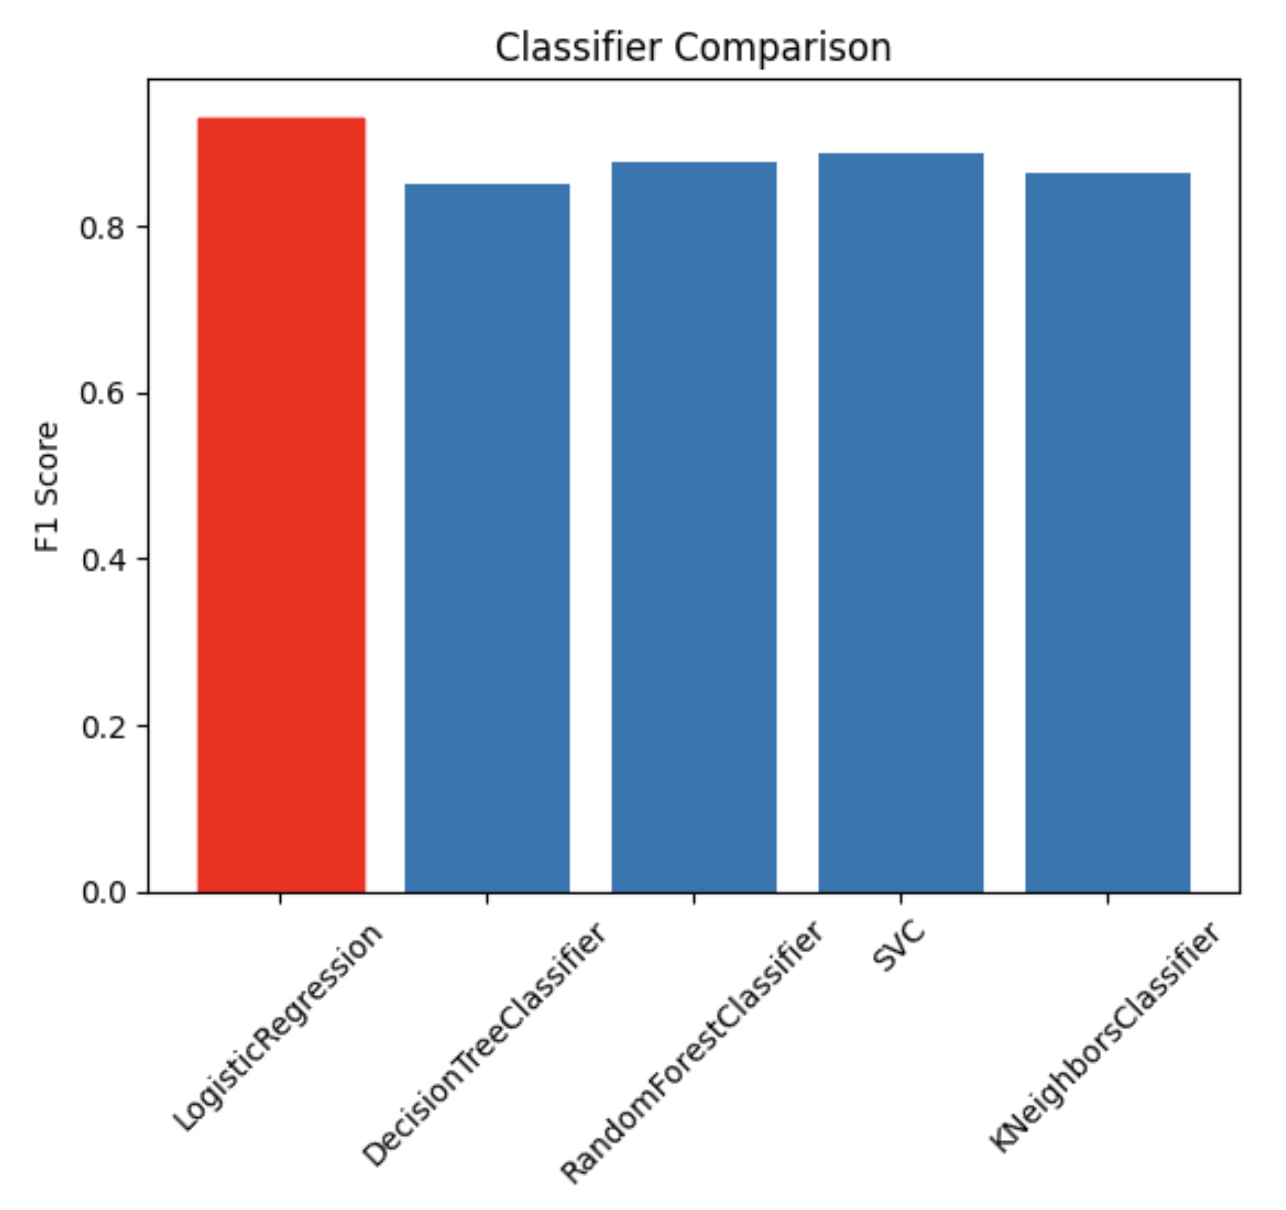
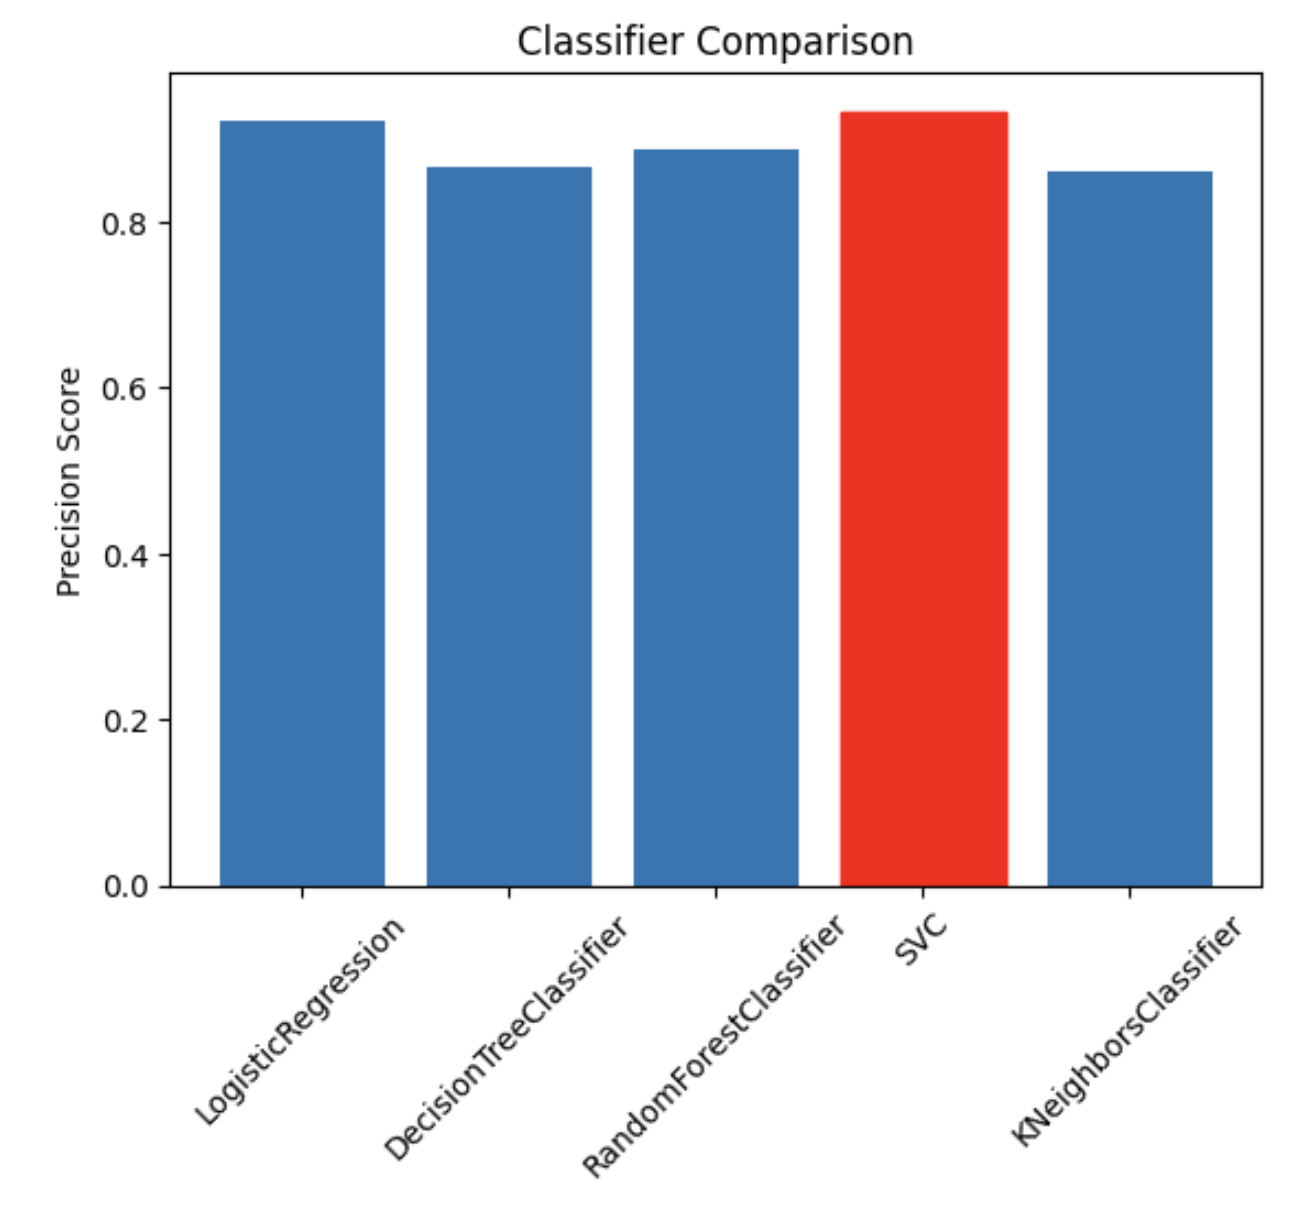  

* **Step 00:** Detecting paths of data & other related files

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


* Import data from csvs

* **Step 01:** Import csv files as df & get insights

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

test_input = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

test_df = test_input.merge(gender_sub)

* Data Insights

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


* **Step 02:** Data processing

In [9]:
## embarking: C = Cherbourg, Q = Queenstown, S = Southampton --> Numerical
## Select only age data is available & embarking information should be observed!

# Define the mapping
embark_map = {'C': 0, 'Q': 1, 'S': 2}
sex_map = {'male': 0, 'female': 1}

train_df.dropna(subset=['Age', 'Embarked'], inplace=True)
#test_df.dropna(subset=['Age', 'Embarked', 'Fare'], inplace=True)

# Use the replace method to map values
train_df['Embarked'] = train_df['Embarked'].replace(embark_map)
train_df['Sex'] = train_df['Sex'].replace(sex_map)

test_df['Embarked'] = test_df['Embarked'].replace(embark_map)
test_df['Sex'] = test_df['Sex'].replace(sex_map)

## Fill nan values with mean in test input
test_df.Fare.fillna(value=test_df.Fare.mean(), inplace=True) 

In [10]:
## Drop irrelevant columns
train_df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name','Cabin', 'Ticket'], axis=1, inplace=True)

In [11]:
## Assign passenger id as index

train_df = train_df.set_index('PassengerId')
test_df = test_df.set_index('PassengerId')

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


In [13]:
## Rearrange test df to compare easily with train set

test_df = test_df.reindex(columns=train_df.columns)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.4 KB


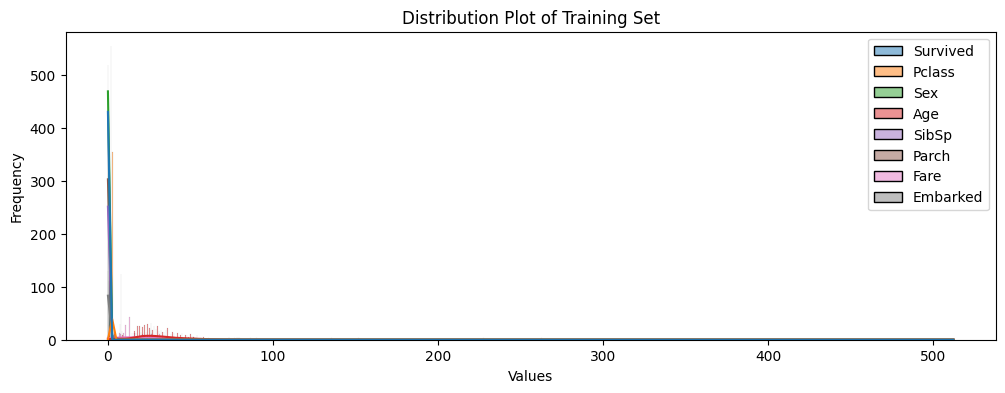

In [14]:
# Create a histogram with Seaborn
plt.figure(figsize=(12, 4))
sns.histplot(train_df, kde=True)
plt.title('Distribution Plot of Training Set')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

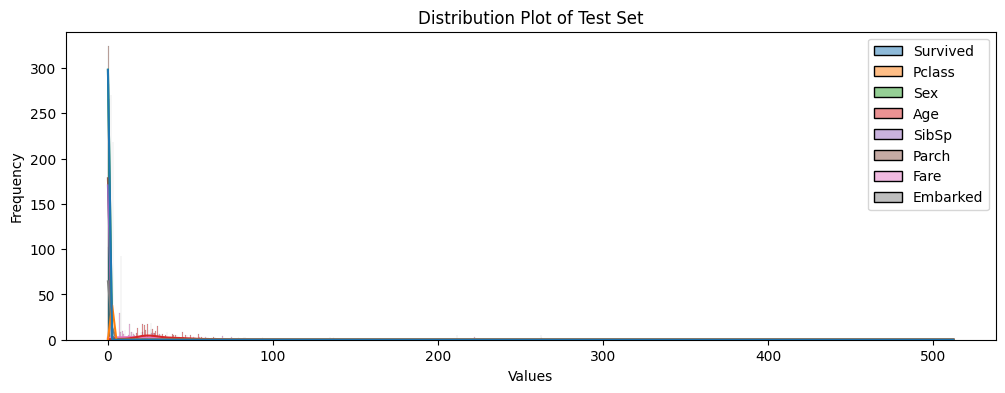

In [15]:
# Create a histogram with Seaborn
plt.figure(figsize=(12, 4))
sns.histplot(test_df, kde=True)
plt.title('Distribution Plot of Test Set')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Correlation Map of Training Set')

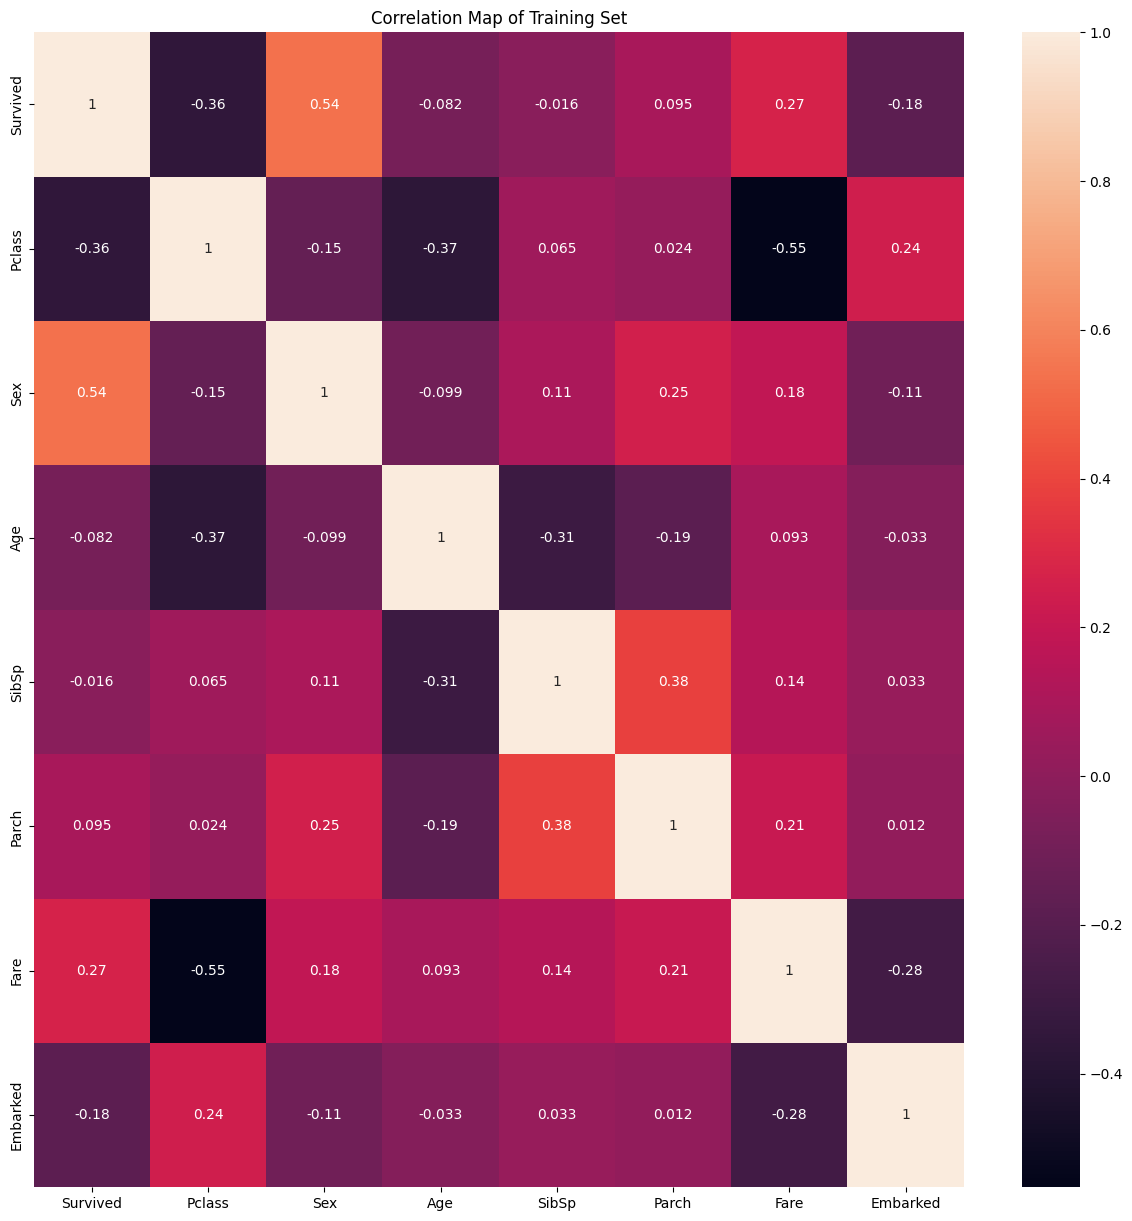

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(), annot=True)
plt.title('Correlation Map of Training Set')

* **Step 03:** Data standardization

In [17]:
## applied standard scaling to input data (excluding survived column (target) to avoid training issues)

scaled_train_df = (train_df.iloc[:, 1:] - train_df.iloc[:, 1:].mean(axis=0)) / train_df.iloc[:, 1:].std(axis=0)
scaled_test_df = (test_df.iloc[:, 1:] - train_df.iloc[:, 1:].mean(axis=0)) / train_df.iloc[:, 1:].std(axis=0)

## add exact value of 'Survived' column
scaled_train_df['Survived'] = train_df['Survived']
scaled_test_df['Survived'] = test_df['Survived']

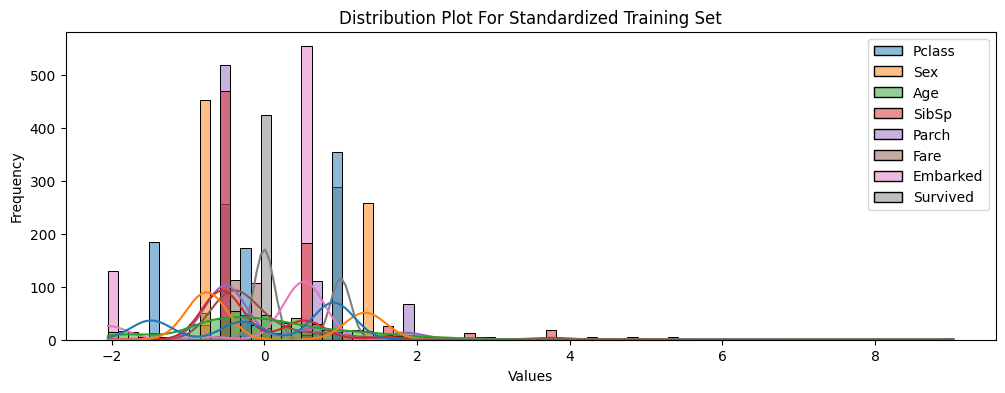

In [18]:
# Distribution after scaling in training set
plt.figure(figsize=(12, 4))
sns.histplot(scaled_train_df, kde=True)
plt.title('Distribution Plot For Standardized Training Set')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

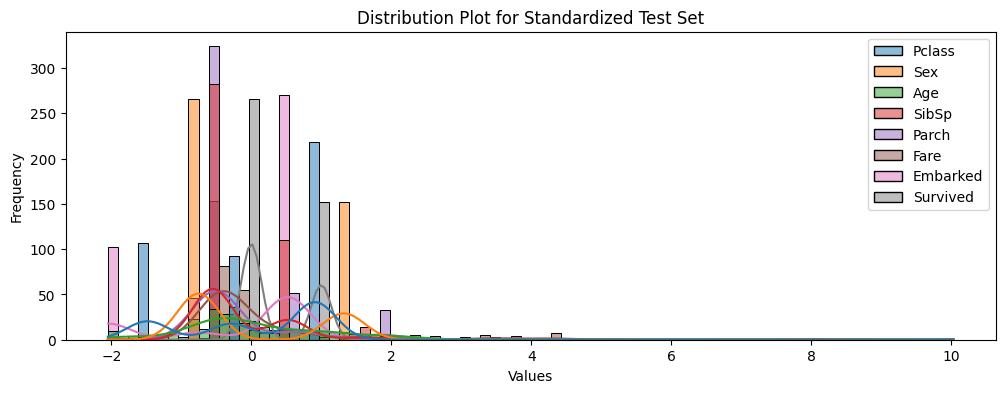

In [19]:
# Distribution after scaling in test set
plt.figure(figsize=(12, 4))
sns.histplot(scaled_test_df, kde=True)
plt.title('Distribution Plot for Standardized Test Set')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

* **Step 04.** Feature selection for training & deep dive to data

Text(0.5, 1.0, 'Correlation Map of Scaled Training Set')

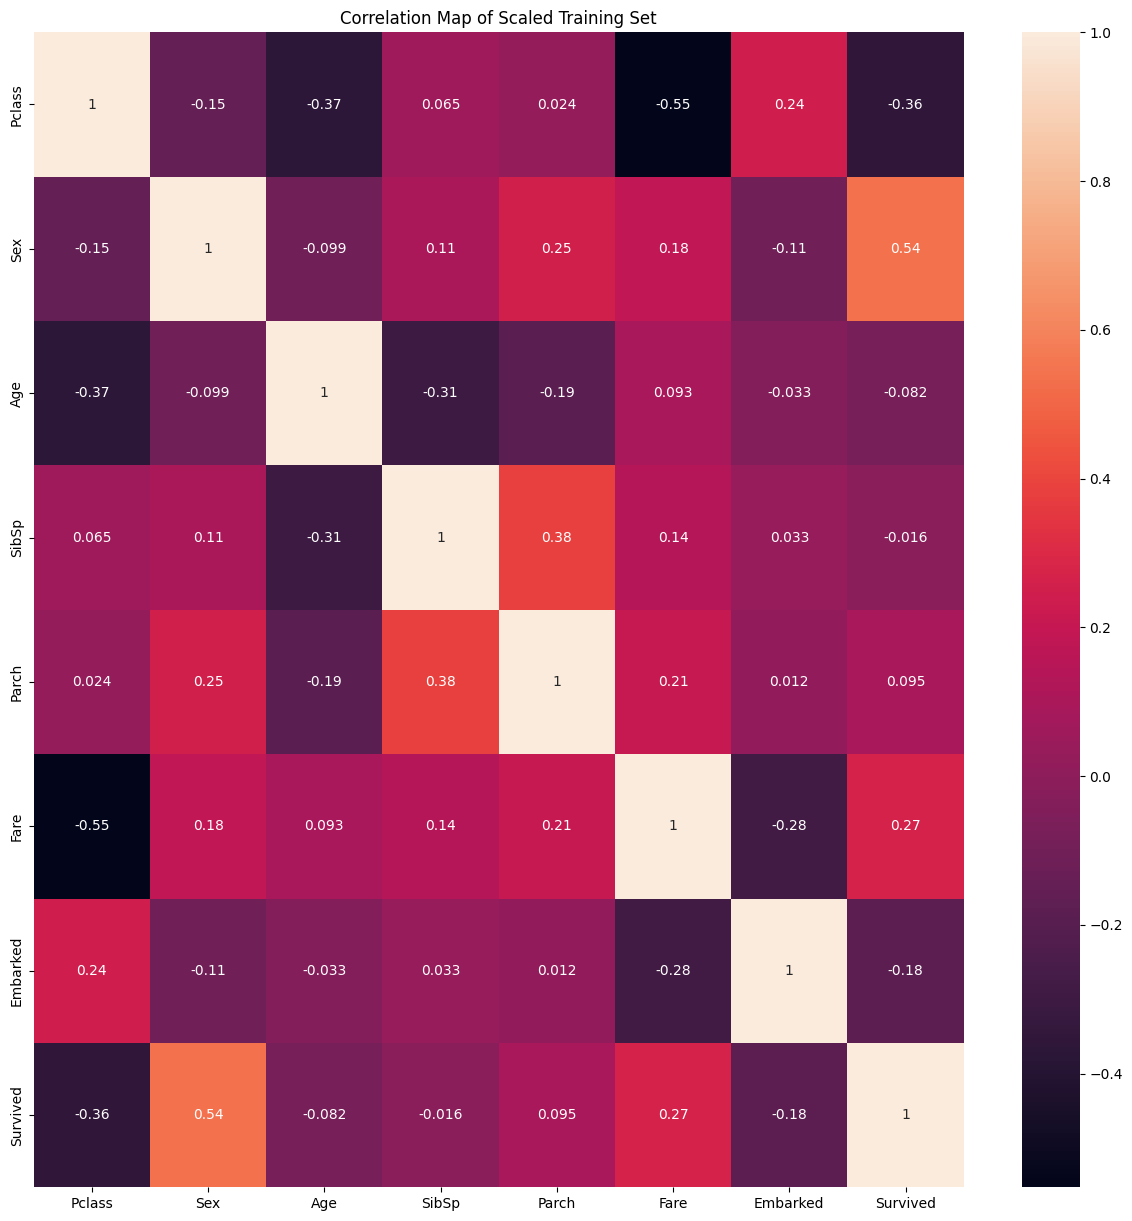

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(scaled_train_df.corr(), annot=True)
plt.title('Correlation Map of Scaled Training Set')

In [21]:
scaled_train_df.corr().iloc[:, -1]
## Pclass, sex & fare can be used
## Embark is tested!

Pclass     -0.356462
Sex         0.536762
Age        -0.082446
SibSp      -0.015523
Parch       0.095265
Fare        0.266100
Embarked   -0.181979
Survived    1.000000
Name: Survived, dtype: float64

In [22]:
num_dead_men = len(train_df[(train_df['Sex'] == 0) &  (train_df['Survived'] == 0)])
num_dead_women = len(train_df[(train_df['Sex'] == 1) &  (train_df['Survived'] == 0)])

print("In training set: ")
print('Total death in men: ', num_dead_men)
print('Total survived men: ', len(train_df[train_df['Sex'] == 0]) - num_dead_men)
print('Total death in women: ', num_dead_women)
print('Total survived women: ', len(train_df[train_df['Sex'] == 1]) - num_dead_women)

In training set: 
Total death in men:  360
Total survived men:  93
Total death in women:  64
Total survived women:  195


In [23]:
num_dead_men_test = len(test_df[(test_df['Sex'] == 0) &  (test_df['Survived'] == 0)])
num_dead_women_test = len(test_df[(test_df['Sex'] == 1) &  (test_df['Survived'] == 0)])

print("In training set: ")
print('Total death in men: ', num_dead_men_test)
print('Total survived men: ', len(test_df[test_df['Sex'] == 0]) - num_dead_men_test)
print('Total death in women: ', num_dead_women_test)
print('Total survived women: ', len(test_df[test_df['Sex'] == 1]) - num_dead_women_test)

In training set: 
Total death in men:  266
Total survived men:  0
Total death in women:  0
Total survived women:  152


* **Step 05.** ML Model Training by *scikit-learn*

In [24]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
## Define training & test sets

trn_X, trn_y = scaled_train_df[['Sex', 'Fare', 'Pclass', 'Embarked']], scaled_train_df['Survived']
tst_X, tst_y = scaled_test_df[['Sex', 'Fare', 'Pclass', 'Embarked']], scaled_test_df['Survived']

In [26]:
# Train binary classification models
# Define preferred classifiers as list

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
]

# Initialize dictionaries to store results
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

In [27]:
# Train and evaluate each classifier
for clf in classifiers:
    clf.fit(trn_X, trn_y)
    y_pred = clf.predict(tst_X)
    
    # Calculate performance metrics
    accuracy = accuracy_score(tst_y, y_pred)
    precision = precision_score(tst_y, y_pred, average='macro')
    recall = recall_score(tst_y, y_pred, average='macro')
    f1 = f1_score(tst_y, y_pred, average='macro')
    
    # Store the results
    clf_name = clf.__class__.__name__
    accuracy_scores[clf_name] = accuracy
    precision_scores[clf_name] = precision
    recall_scores[clf_name] = recall
    f1_scores[clf_name] = f1

* **Step 06.** Evaluate ML models 

In [28]:
# Print the training results
print("Accuracy Scores:")
print(accuracy_scores)

print("\nPrecision Scores:")
print(precision_scores)

print("\nRecall Scores:")
print(recall_scores)

print("\nF1 Scores:")
print(f1_scores)

Accuracy Scores:
{'LogisticRegression': 0.9330143540669856, 'DecisionTreeClassifier': 0.861244019138756, 'RandomForestClassifier': 0.8779904306220095, 'SVC': 0.9019138755980861, 'KNeighborsClassifier': 0.8732057416267942}

Precision Scores:
{'LogisticRegression': 0.9222222222222223, 'DecisionTreeClassifier': 0.8598484848484849, 'RandomForestClassifier': 0.8731213354840361, 'SVC': 0.9332247557003257, 'KNeighborsClassifier': 0.8616663006076579}

Recall Scores:
{'LogisticRegression': 0.9473684210526316, 'DecisionTreeClassifier': 0.8359962406015038, 'RandomForestClassifier': 0.8604323308270676, 'SVC': 0.8651315789473684, 'KNeighborsClassifier': 0.8665413533834586}

F1 Scores:
{'LogisticRegression': 0.9300535475234271, 'DecisionTreeClassifier': 0.845351092059604, 'RandomForestClassifier': 0.8660079573095996, 'SVC': 0.8862766176285178, 'KNeighborsClassifier': 0.8639548522196226}


* **Step 07.** Visualize the test results

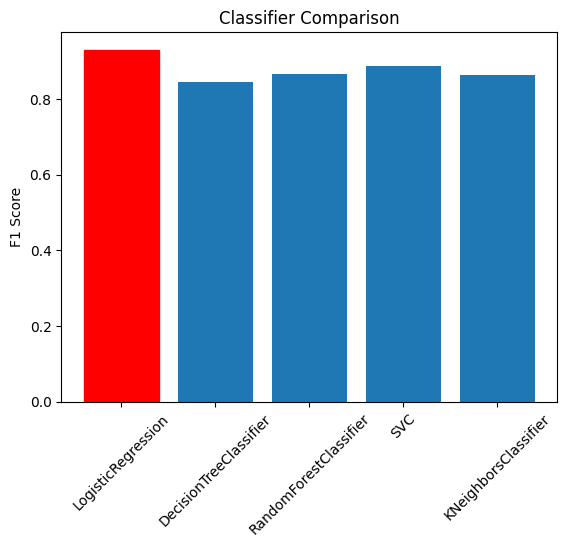

In [29]:
# Find the classifier with the highest accuracy
best_classifier = max(f1_scores, key=f1_scores.get)

# Visualize the results with the highest accuracy bar filled with a different color
fig, ax = plt.subplots()
bars = ax.bar(f1_scores.keys(), f1_scores.values())
ax.set_ylabel('F1 Score')
ax.set_title('Classifier Comparison')
plt.xticks(rotation=45)

# Find and color the best classifier's bar
best_index = list(f1_scores.keys()).index(best_classifier)
bars[best_index].set_color('red')  

plt.show()

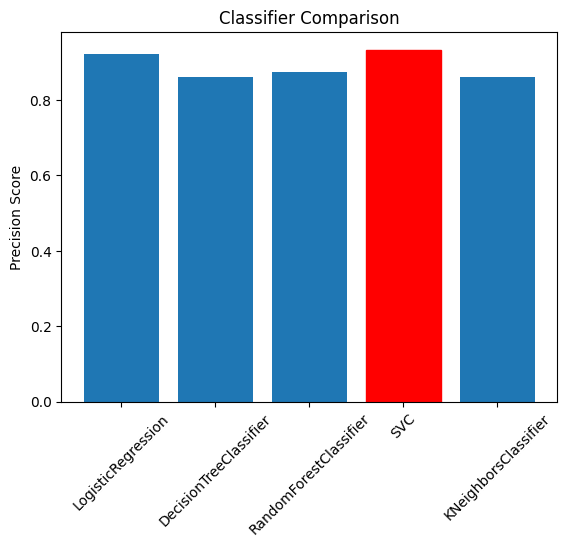

In [30]:
# Find the classifier with the highest precision
best_classifier = max(precision_scores, key=precision_scores.get)

# Visualize the results with the highest precision bar filled with a different color
fig, ax = plt.subplots()
bars = ax.bar(precision_scores.keys(), precision_scores.values())
ax.set_ylabel('Precision Score')
ax.set_title('Classifier Comparison')
plt.xticks(rotation=45)

# Find and color the best classifier's bar
best_index = list(precision_scores.keys()).index(best_classifier)
bars[best_index].set_color('red')  

plt.show()

In [31]:
best_clf = classifiers[0]          ##Logistic regression that has the highest F1 score
best_clf.fit(trn_X, trn_y)
best_predictions = best_clf.predict(tst_X)

In [32]:
submission_df = pd.DataFrame({
    'PassengerId': tst_X.index,
    'Survived': best_predictions
})

In [33]:
submission_df.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
submission_df.to_csv('gk_submission.csv', index=False)